In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
BM_train = pd.read_csv('E:\\projects\\bigdatamart_Train.csv')

In [3]:
BM_test =  pd.read_csv('E:\\projects\\bigdatamart_Test.csv')

In [4]:
BM_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
BM_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


#### checking for null values

In [6]:
BM_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
BM_train.shape

(8523, 12)

'Item Weight' has 17.16% null values

'Outlet_Size' has 28.27% null values

In [8]:
BM_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
BM_test.shape

(5681, 11)

'Item Weight' has 17.18% null values

'Outlet_Size' has 28.26% null values

### Dataframe Description:

Problem Statement:
    
The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

Features:

Item_Identifier : ID of item

Item_Weight : Weight of item

Item_Fat_Content : Fat content of the item

Item_Visibility: Estimates the customer reach of the item

Item_Type : Type of item

Item_MRP : Maximum Retail Price of Item

Outlet_Identifier : ID of Retail Outlet

Outlet_Establishment_Year : Year in which Retail Outlet was established

Outlet_Size : Size of Outlet

Outlet_Location_Type : The tier of the city where the Retail outlet is located

Outlet_Type : whether grocery store or a type of supermarket


Label/Target Variable:

Item_Outlet_Sales: The total sales made by an outlet

#### Checking for 0 values in dataset

In [10]:
(BM_train==0).sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

'Item_Visibility' has 526 '0' values

In [11]:
(BM_test==0).sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              353
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

'Item_Visibility' has 353 '0' values

#### Getting the basic summary and statistical information of the data.

In [12]:
BM_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item_Fat_Content has 5 unique categories

Item_Type  has 16 unique categories

Outlet_Identifier has 10 unique categories

Outlet_Establishment_Year 9 discrete values

Outlet_Size has  3 unique categories

Outlet_Location_Type has  3 unique categories

Outlet_Type has 4 unique categories


In [13]:
BM_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [14]:
BM_test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

Item_Fat_Content has 5 unique categories

Item_Type has 16 unique categories

Outlet_Identifier has 10 unique categories

Outlet_Establishment_Year 9 discrete values

Outlet_Size has 3 unique categories

Outlet_Location_Type has 3 unique categories

Outlet_Type has 4 unique categories

#### Getting the basic summary and statistical information of the data.

In [15]:
BM_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
BM_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Item_Fat_Content, Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type  are object type meaning they are categorical in nature, while Outlet_Establishment_Year is discrete int type,

Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales  are float type and continuous in nature.

In [17]:
BM_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
BM_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above tables it is observed that the outlets have been operating from as early as 1985, on an average the outlets have been running since 1997, with last one having been established in 2009.

The average MRP of the items is 140.9 and 50% of the items are priced upto around 143. 

The average sales made by the outlets is 2181.28

### Filling Null Values in the datasets

In [19]:
BM_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

'Item Weight' has 17.16% null values

'Outlet_Size' has 28.27% null values

In [20]:
BM_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

'Item Weight' has 17.18% null values

'Outlet_Size' has 28.26% null values

'Item_Weight' is continuous in nature, imputing null values with either mean or median will be the ideal strategy.

In [21]:
BM_train['Item_Weight'].head(50) #Examining the null values in 'Item_Weight'

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7        NaN
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18       NaN
19    13.350
20    18.850
21       NaN
22    14.600
23       NaN
24    13.850
25    13.000
26     7.645
27    11.650
28     5.925
29       NaN
30    19.250
31    18.600
32    18.700
33    17.850
34    17.500
35    10.000
36       NaN
37     8.850
38       NaN
39       NaN
40    13.350
41     9.800
42    13.600
43    21.350
44    12.150
45     6.420
46    19.600
47    10.000
48    15.850
49       NaN
Name: Item_Weight, dtype: float64

In [22]:
BM_test['Item_Weight'].head(50)  #Examining the null values in 'Item_Weight'

0     20.750
1      8.300
2     14.600
3      7.315
4        NaN
5      9.800
6     19.350
7        NaN
8      6.305
9      5.985
10    16.600
11     6.590
12       NaN
13     4.785
14    16.750
15     6.135
16    19.850
17    17.850
18       NaN
19    13.600
20     7.100
21    19.200
22    13.650
23       NaN
24    19.200
25     6.785
26    13.000
27     5.825
28    13.800
29    12.800
30       NaN
31     9.500
32    12.500
33       NaN
34     5.780
35       NaN
36       NaN
37    10.395
38    18.350
39       NaN
40    21.100
41    19.750
42     8.430
43    15.350
44     6.710
45    10.195
46    11.650
47    12.850
48    12.150
49    18.250
Name: Item_Weight, dtype: float64

#### Checking for Outliers

<AxesSubplot:xlabel='Item_Weight'>

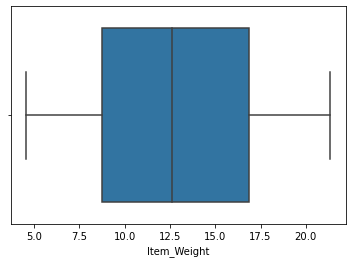

In [23]:
 sns.boxplot(BM_train['Item_Weight'])

No outliers exist

<AxesSubplot:xlabel='Item_Weight'>

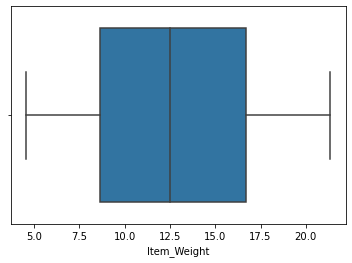

In [24]:
 sns.boxplot(BM_test['Item_Weight'])

No outliers exist

'Item_Weight' also has a relation to 'item type', for eg: items belonging to 'Meat' / 'Fruits and Vegetables' won't be in the same weight range as those items that belong to 'Soft Drinks' or 'Hard Drinks'. Therefore filling in the null values with the mean of Item_weight values belonging to their own respective 'item type'.

In [25]:
BM_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
BM_test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [27]:
mean_wt = BM_test.groupby('Item_Type').agg({'Item_Weight':'mean'})
mean_wt1 = BM_train.groupby('Item_Type').agg({'Item_Weight':'mean'})

Creating a series of mean weights based on their item identifier type.

In [28]:
mean_wt1

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [29]:
mean_wt

,Item_Weight
Item_Type,
Baking Goods,12.272418
Breads,10.866799
Breakfast,13.759603
Canned,12.393565
Dairy,12.955040
Frozen Foods,12.101543
Fruits and Vegetables,13.146659
Hard Drinks,11.844417
Health and Hygiene,13.216929


In [30]:
mean_wt1.index

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object', name='Item_Type')

In [31]:
mean_wt.index

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object', name='Item_Type')

Creating a new column in main dataframes to map corresponding values of the column to nan values.

In [32]:
meanwtdt = dict(zip(mean_wt.index,mean_wt.Item_Weight)) #dictionary with Item_Type values as keys and avg_wt values as values.

In [33]:
meanwt1dt = dict(zip(mean_wt1.index,mean_wt1.Item_Weight)) #dictionary with Item_Type values as keys and avg_wt values as values.

In [34]:
BM_test['meanwt'] = BM_test['Item_Type'].map(meanwtdt) # This creates a column "meanwt" and maps values into it based on corresponding values of 'Item_Type'

In [35]:
BM_train['meanwt1'] = BM_train['Item_Type'].map(meanwt1dt) 

In [36]:
BM_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,meanwt
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,12.684256
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,12.955040
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,14.009725
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,12.684256
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,12.955040
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,12.684256
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,13.618247
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,13.216929
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,12.393565


In [37]:
BM_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,meanwt1
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.426069
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.847460
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.817344
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,13.224769
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,13.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,12.987880
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,12.277108
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,13.142314
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12.987880


In [38]:
BM_test['Item_Weight'] = BM_test['Item_Weight'].replace('None', np.nan) #replacing none type values with nan values

In [39]:
BM_test['Item_Weight'] = BM_test['Item_Weight'].fillna((BM_test['meanwt'])) #filling null values in 'Item_Weight' with values from 'meanwt'

In [40]:
BM_train['Item_Weight'] = BM_train['Item_Weight'].replace('None', np.nan) #replacing none type values with nan values

In [41]:
BM_train['Item_Weight'] = BM_train['Item_Weight'].fillna((BM_train['meanwt1'])) #filling null values in 'Item_Weight' with values from 'meanwt'

In [42]:
BM_test.drop(columns='meanwt',inplace=True)

In [43]:
BM_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.31500,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.95504,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.60000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.00000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.30000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [44]:
BM_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

No more null values exist in Item_Weight  

In [45]:
BM_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
meanwt1                         0
dtype: int64

No more null values exist in Item_Weight  

In [46]:
BM_train.drop(columns = ['meanwt1'],inplace=True)

In [47]:
BM_test['Item_Weight'].head(50)

0     20.750000
1      8.300000
2     14.600000
3      7.315000
4     12.955040
5      9.800000
6     19.350000
7     12.272418
8      6.305000
9      5.985000
10    16.600000
11     6.590000
12    13.216929
13     4.785000
14    16.750000
15     6.135000
16    19.850000
17    17.850000
18    13.270504
19    13.600000
20     7.100000
21    19.200000
22    13.650000
23    14.009725
24    19.200000
25     6.785000
26    13.000000
27     5.825000
28    13.800000
29    12.800000
30    13.270504
31     9.500000
32    12.500000
33    13.146659
34     5.780000
35    12.702148
36    12.393565
37    10.395000
38    18.350000
39    13.270504
40    21.100000
41    19.750000
42     8.430000
43    15.350000
44     6.710000
45    10.195000
46    11.650000
47    12.850000
48    12.150000
49    18.250000
Name: Item_Weight, dtype: float64

In [48]:
BM_train['Item_Weight'].head(50)

0      9.300000
1      5.920000
2     17.500000
3     19.200000
4      8.930000
5     10.395000
6     13.650000
7     12.987880
8     16.200000
9     19.200000
10    11.800000
11    18.500000
12    15.100000
13    17.600000
14    16.350000
15     9.000000
16    11.800000
17     9.000000
18    11.400328
19    13.350000
20    18.850000
21    12.277108
22    14.600000
23    12.277108
24    13.850000
25    13.000000
26     7.645000
27    11.650000
28     5.925000
29    12.305705
30    19.250000
31    18.600000
32    18.700000
33    17.850000
34    17.500000
35    10.000000
36    13.224769
37     8.850000
38    12.987880
39    12.987880
40    13.350000
41     9.800000
42    13.600000
43    21.350000
44    12.150000
45     6.420000
46    19.600000
47    10.000000
48    15.850000
49    13.426069
Name: Item_Weight, dtype: float64

### Filling out the null values in Outlet_Size

#### Outlet_Size data is categorical in nature. Therefore imputing the most frequent value of Outlet_Size.

In [49]:
BM_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [50]:
BM_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [51]:
BM_train['Outlet_Size'] =BM_train['Outlet_Size'].fillna(BM_train['Outlet_Size'].mode()[0]) #filling null values in most frequently occuring value in Outlet_Size.

In [52]:
BM_test['Outlet_Size'] =BM_test['Outlet_Size'].fillna(BM_test['Outlet_Size'].mode()[0]) #filling null values in most frequently occuring value in Outlet_Size.

In [53]:
BM_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [54]:
BM_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Dropping column 'Item_Identifier' since it doesn't contribute to building a good model for predicting the target variable values.

In [55]:
BM_train.drop(columns = ['Item_Identifier'],inplace=True)
BM_test.drop(columns = ['Item_Identifier'],inplace=True)

### Analysing Features with Continuous data type

In [56]:
BM_train.nunique()

Item_Weight                   431
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

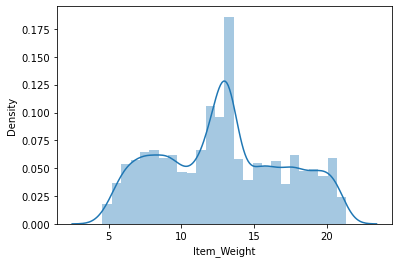

In [57]:
sns.distplot(BM_train.Item_Weight )

Data looks normally distributed with mean,median and mode values falling within 10-15 range

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

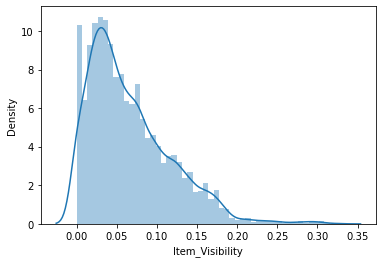

In [58]:
sns.distplot(BM_train.Item_Visibility )

Data distribution is right skewed with values trailing off from 0.19 mark

In [59]:
BM_train.Item_Visibility.skew()

1.1670905496918396

In [60]:
(BM_train.Item_Visibility==0).sum()

526

<AxesSubplot:xlabel='Item_Visibility'>

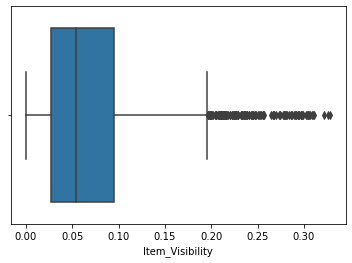

In [61]:
sns.boxplot(BM_train.Item_Visibility)

Outliers exist

Removing outliers using z-score technique

In [62]:
df2 = BM_train.Item_Visibility.copy()

In [63]:
df2

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [64]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3)] #taking 3 as threshold value

In [65]:
df2.shape

(8523,)

In [66]:
df3.shape

(8428,)

Data Loss %

In [67]:
(8523-8428)/8523*100

1.1146309984747156

1.11% Data loss is within acceptable range

In [68]:
dropindx = BM_train.index.difference(df3.index)

In [69]:
BM_train.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

<AxesSubplot:xlabel='Item_Visibility'>

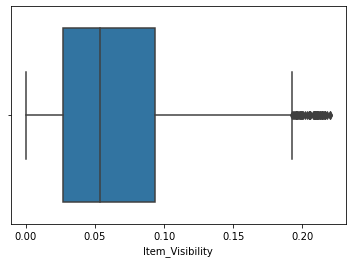

In [70]:
sns.boxplot(BM_train.Item_Visibility)

Some amount of outliers has been removed.

In [71]:
BM_train.skew()

Item_Weight                  0.088761
Item_Visibility              0.795956
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

Imputing 0 values using simple imputer and strategy = median

In [72]:
from sklearn.impute import SimpleImputer

In [73]:
si = SimpleImputer(missing_values = 0,strategy = 'median',verbose = 0 )

In [74]:
si = si.fit(BM_train[['Item_Visibility']])

In [75]:
BM_train[['Item_Visibility']] = si.transform(BM_train[['Item_Visibility']])

In [76]:
(BM_train==0).sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no more 0 values.

In [77]:
si = SimpleImputer(missing_values = 0,strategy = 'median',verbose = 0 )

In [78]:
Si = si.fit(BM_test[['Item_Visibility']])

In [79]:
BM_test[['Item_Visibility']] = Si.transform(BM_test[['Item_Visibility']])

In [80]:
(BM_test==0).sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

There are no more 0 values.

In [81]:
BM_test.Item_Visibility.skew() 

1.395046074467687

Removing outliers using z-score technique

In [82]:
df2 = BM_test.Item_Visibility.copy()

In [83]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3)] #taking 3 as threshold value

In [84]:
df2.shape

(5681,)

In [85]:
df3.shape

(5594,)

Data Loss %

In [86]:
(5681-5594)/5681 *100

1.531420524555536

1.53% Data loss is within acceptable range

In [87]:
dropindx = BM_test.index.difference(df3.index)

In [88]:
BM_test.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [89]:
BM_test.shape

(5594, 10)

In [90]:
BM_train.reset_index(drop=True,inplace=True)

In [91]:
BM_test.reset_index(drop=True,inplace=True)

#### Reducing skewness further using PowerTransformer

In [92]:
from sklearn.preprocessing import PowerTransformer

In [93]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [94]:
df4 = BM_train[['Item_Visibility']]

In [95]:
transformed= powtrans.fit_transform(df4[['Item_Visibility']])

In [96]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [97]:
transformed.skew()

Item_Visibility    0.132488
dtype: float64

In [98]:
transformed.index = BM_train.index

In [99]:
BM_train[['Item_Visibility']]= transformed[['Item_Visibility']]

In [100]:
BM_train.Item_Visibility.skew()

0.1324881487813592

Skewness has been considerably reduced

In [101]:
df5 = BM_test[['Item_Visibility']]

In [102]:
transformed= powtrans.fit_transform(df5[['Item_Visibility']])

In [103]:
transformed = pd.DataFrame(transformed, columns=df5.columns) #to convert numpy array back into dataframe

In [104]:
transformed.skew()

Item_Visibility    0.119684
dtype: float64

In [105]:
transformed.index = BM_test.index

In [106]:
BM_test[['Item_Visibility']]= transformed[['Item_Visibility']]

In [107]:
BM_test.skew()

Item_Weight                  0.140870
Item_Visibility              0.119684
Item_MRP                     0.133769
Outlet_Establishment_Year   -0.412076
dtype: float64

Skewness has been considerably reduced

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

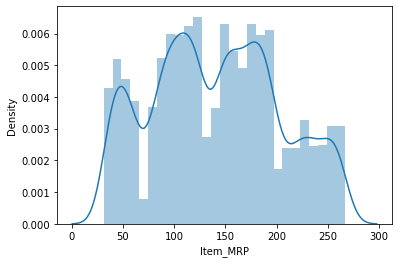

In [108]:
sns.distplot(BM_train.Item_MRP )

Distribution appears to be multi modal. The mean MRP of the items is 140.9.

<AxesSubplot:xlabel='Item_MRP'>

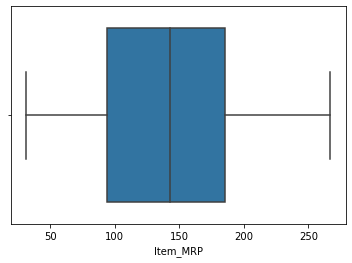

In [109]:
sns.boxplot(BM_train.Item_MRP)

No outliers present

### Analysing Outlet_Establishment_Year Feature

In [110]:
BM_train.Outlet_Establishment_Year.value_counts()

1985    1410
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     513
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

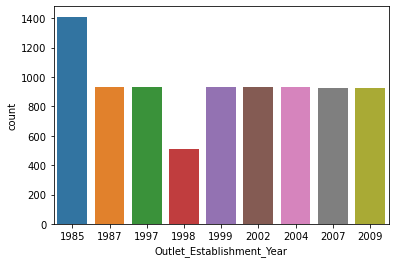

In [111]:
sns.countplot(BM_train.Outlet_Establishment_Year)

Highest number of outlets were established in 1985. With the exception of 1998,1987,1997,1999,2002,2004,2007,2009 saw a similar number of new outlets having been established.

#### Extracting the age of outlets from Outlet_Establishment_Year column will give a better insight into its relationship with target column data.

In [112]:
BM_train['Age'] = BM_train['Outlet_Establishment_Year'].apply(lambda y: 2021 - y) 

BM_test['Age'] = BM_test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 


In [113]:
BM_test.drop(columns=['Outlet_Establishment_Year'],inplace=True)
BM_train.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [114]:
BM_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.75000,Low Fat,-1.833918,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22
1,8.30000,reg,-0.608874,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,14
2,14.60000,Low Fat,0.930118,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,23
3,7.31500,Low Fat,-1.485170,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,14
4,12.95504,Regular,1.248922,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36


In [115]:
BM_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30,Low Fat,-1.442725,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92,Regular,-1.309692,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50,Low Fat,-1.412983,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20,Regular,-0.051106,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,8.93,Low Fat,-0.051106,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


In [116]:
BM_train.Age.value_counts()

36    1410
34     932
22     930
24     930
17     930
19     929
12     928
14     926
23     513
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

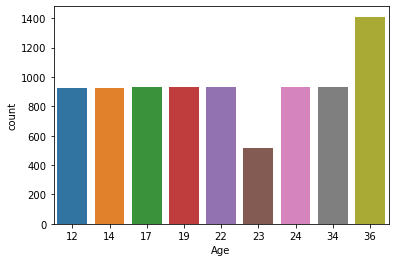

In [117]:
sns.countplot(BM_train.Age)

Highest number of outlet is 36 years old

Item_Weight                   431
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [118]:
BM_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

'Item_Fat_Content' actually has only 2 unique categories : 'Low Fat' and 'Regular' while 'low fat' and 'LF' are infact 'Low Fat' while 'reg' is actually 'Regular.' 

#### Converting the mistyped ones to the original categories

In [119]:
BM_train['Item_Fat_Content'] = BM_train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'})

In [120]:
BM_test['Item_Fat_Content'] = BM_test['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'})

In [121]:
BM_test.Item_Fat_Content.value_counts()

Low Fat    3622
Regular    1972
Name: Item_Fat_Content, dtype: int64

In [122]:
BM_train.Item_Fat_Content.value_counts()

Low Fat    5463
Regular    2965
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

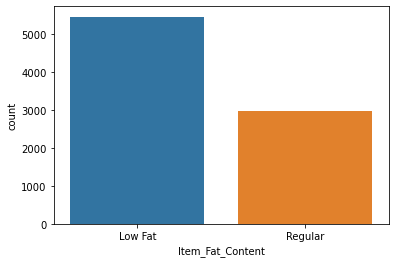

In [123]:
sns.countplot(BM_train.Item_Fat_Content)

Low fat products are mor popular than Regular fat products

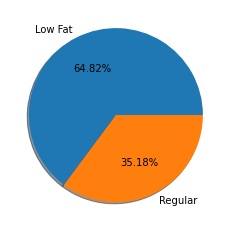

In [124]:
labels = 'Low Fat','Regular'
fig, ax = plt.subplots()
ax.pie(BM_train.Item_Fat_Content.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Low Fat products form 64.73% of total sold items while Regular forms 35.27%

In [125]:
BM_train.Item_Type.value_counts()

Fruits and Vegetables    1218
Snack Foods              1185
Household                 903
Frozen Foods              846
Dairy                     672
Canned                    644
Baking Goods              640
Health and Hygiene        517
Soft Drinks               441
Meat                      420
Breads                    248
Hard Drinks               212
Others                    169
Starchy Foods             145
Breakfast                 107
Seafood                    61
Name: Item_Type, dtype: int64

Item_Type has 16 unique categories.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

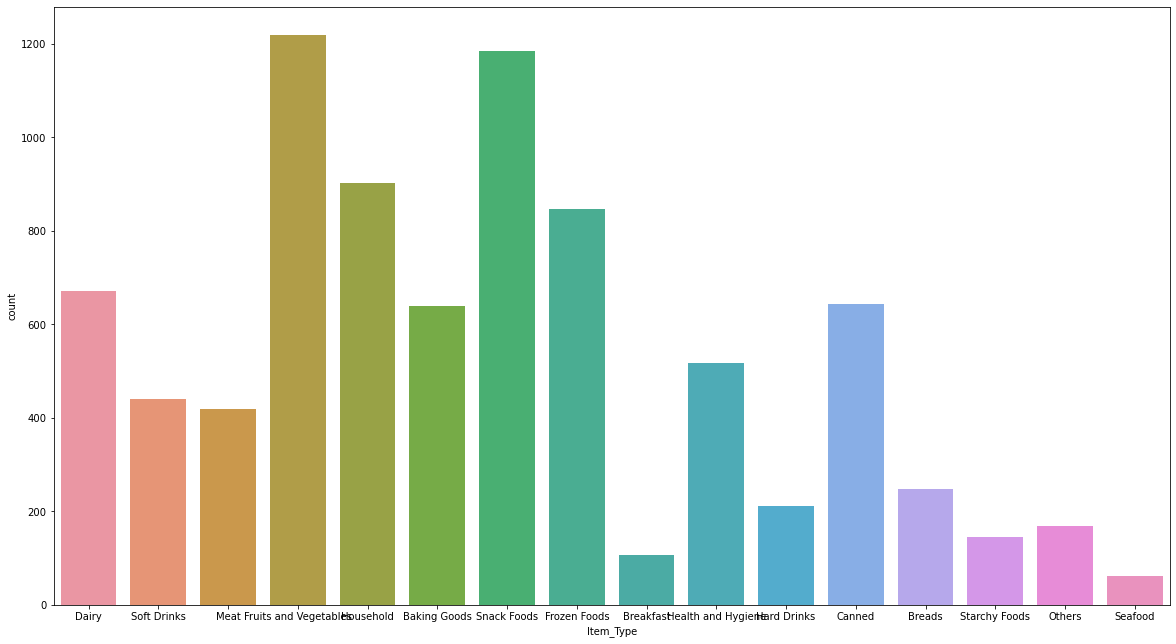

In [126]:
plt.figure(figsize=(20,11))
sns.countplot(BM_train.Item_Type)

Most bought items are Fruits and Vegetables, Household items, Snack Food, and Frozen foods.

### We can further club these catergories into Foods, Beverages and Inedibles

In [127]:
tst = BM_train.copy()

In [128]:
BM_train['Item_Type'] = BM_train['Item_Type'].replace({'Dairy':'Foods','Soft Drinks':'Beverages','Meat':'Foods', 'Fruits and Vegetables':'Foods','Household':'Inedibles','Baking Goods':'Foods','Snack Foods':'Foods','Frozen Foods':'Foods','Breakfast':'Foods','Health and Hygiene':'Inedibles','Hard Drinks':'Beverages','Canned':'Foods','Breads':'Foods','Starchy Foods':'Foods','Others':'Inedibles','Seafood':'Foods'})

In [129]:
BM_test['Item_Type'] = BM_train['Item_Type'].replace({'Dairy':'Foods','Soft Drinks':'Beverages','Meat':'Foods', 'Fruits and Vegetables':'Foods','Household':'Inedibles','Baking Goods':'Foods','Snack Foods':'Foods','Frozen Foods':'Foods','Breakfast':'Foods','Health and Hygiene':'Inedibles','Hard Drinks':'Beverages','Canned':'Foods','Breads':'Foods','Starchy Foods':'Foods','Others':'Inedibles','Seafood':'Foods'})

In [130]:
BM_train.head() 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30,Low Fat,-1.442725,Foods,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92,Regular,-1.309692,Beverages,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50,Low Fat,-1.412983,Foods,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20,Regular,-0.051106,Foods,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,8.93,Low Fat,-0.051106,Inedibles,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


In [131]:
BM_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.75000,Low Fat,-1.833918,Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22
1,8.30000,Regular,-0.608874,Beverages,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,14
2,14.60000,Low Fat,0.930118,Foods,241.7538,OUT010,Medium,Tier 3,Grocery Store,23
3,7.31500,Low Fat,-1.485170,Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,14
4,12.95504,Regular,1.248922,Inedibles,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36


Successfully converted the Item_type categories into 'Foods','Beverages' and 'Inedibles'

#### Item_fat_Content is not Applicable to 'Inedibles', therefore creating a separate category for them under 'Item_Fat_Content'

In [132]:
BM_train.loc[BM_train['Item_Type']=="Inedibles",'Item_Fat_Content'] = "Inedible" 
#assigns all those values in 'Item_Fat_Content' column to 'Inedible' category, which correspond to values in 'Item_Type' column

In [133]:
BM_test.loc[BM_test['Item_Type']=="Inedibles",'Item_Fat_Content'] = "Inedible" 
#assigns all those values in 'Item_Fat_Content' column to 'Inedible' category, which correspond to values in 'Item_Type' column

In [134]:
BM_train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30000,Low Fat,-1.442725,Foods,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92000,Regular,-1.309692,Beverages,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50000,Low Fat,-1.412983,Foods,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20000,Regular,-0.051106,Foods,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,8.93000,Inedible,-0.051106,Inedibles,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34
5,10.39500,Regular,-0.051106,Foods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,12
6,13.65000,Regular,-1.583669,Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,34
7,12.98788,Low Fat,1.334138,Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,36
8,16.20000,Regular,-1.416017,Foods,96.9726,OUT045,Medium,Tier 2,Supermarket Type1,1076.5986,19
9,19.20000,Regular,0.804238,Foods,187.8214,OUT017,Medium,Tier 2,Supermarket Type1,4710.5350,14


In [135]:
BM_test.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.750000,Low Fat,-1.833918,Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22
1,8.300000,Regular,-0.608874,Beverages,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,14
2,14.600000,Low Fat,0.930118,Foods,241.7538,OUT010,Medium,Tier 3,Grocery Store,23
3,7.315000,Low Fat,-1.485170,Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,14
4,12.955040,Inedible,1.248922,Inedibles,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36
5,9.800000,Regular,0.145161,Foods,117.1492,OUT046,Small,Tier 1,Supermarket Type1,24
6,19.350000,Regular,0.591727,Foods,50.1034,OUT018,Medium,Tier 3,Supermarket Type2,12
7,12.272418,Low Fat,-1.468349,Foods,81.0592,OUT027,Medium,Tier 3,Supermarket Type3,36
8,6.305000,Regular,1.320125,Foods,95.7436,OUT045,Medium,Tier 2,Supermarket Type1,19
9,5.985000,Low Fat,-1.921449,Foods,186.8924,OUT017,Medium,Tier 2,Supermarket Type1,14


In [136]:
BM_train.Outlet_Size.value_counts()
          


Medium    5161
Small     2335
High       932
Name: Outlet_Size, dtype: int64

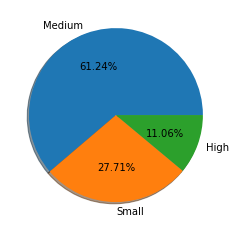

In [137]:
labels = 'Medium','Small','High' 
fig, ax = plt.subplots()
ax.pie(BM_train.Outlet_Size.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Medium Sized outlets form the majority with 61.05% of total outlets, Small outlets are 28.02% while High sized outlets are 10.94% of the total outlets.

In [138]:
BM_train.Outlet_Location_Type.value_counts()

Tier 3    3308
Tier 2    2785
Tier 1    2335
Name: Outlet_Location_Type, dtype: int64

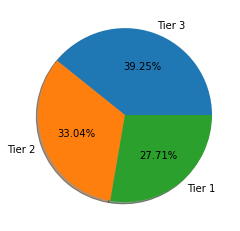

In [139]:
labels = 'Tier 3','Tier 2','Tier 1' 
fig, ax = plt.subplots()
ax.pie(BM_train.Outlet_Location_Type.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

39.31% of total outlets are in Tier 3 cities, 32.68% of the outlets are in Tier 2 cities while 28.02% of the total outlets are in Tier 1 cities.

In [140]:
BM_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store         988
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

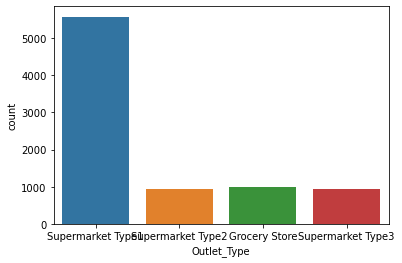

In [141]:
sns.countplot(BM_train.Outlet_Type)

Highest number of outlets are of Supermarket type 1. while the rest are almost equally divided amongst Supermarket type 2,Supermarket type 3 and Grocery Store.

In [142]:
BM_train.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Age                     0
dtype: int64

### Interpreting Relationship between Dependent Variable and Independent Variables

### 'Item_Outlet_Sales' vs MRP

### 'Item_Outlet_Sales' vs Continuous Data Columns




In [143]:
X = BM_train[['Item_MRP','Item_Weight','Item_Visibility']]
y = BM_train['Item_Outlet_Sales']

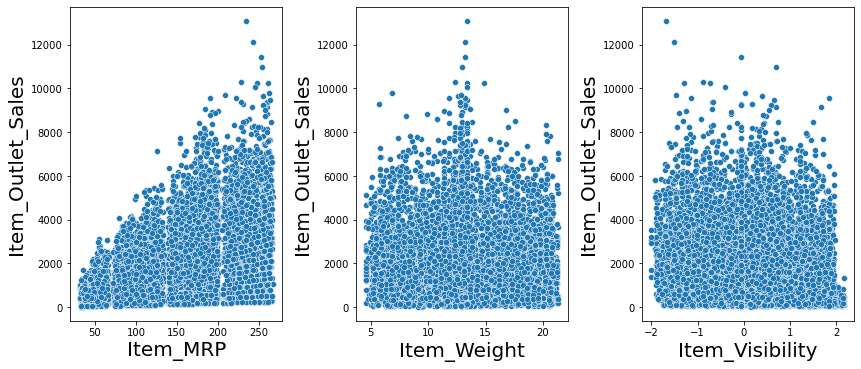

In [144]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnum+=1
plt.tight_layout()

From the graph above, it is observed that There is a positive linear relationship between Item_Outlet_Sales and Item_MRP

'Item_Outlet_Sales' vs Categorical/Discrete Data Columns

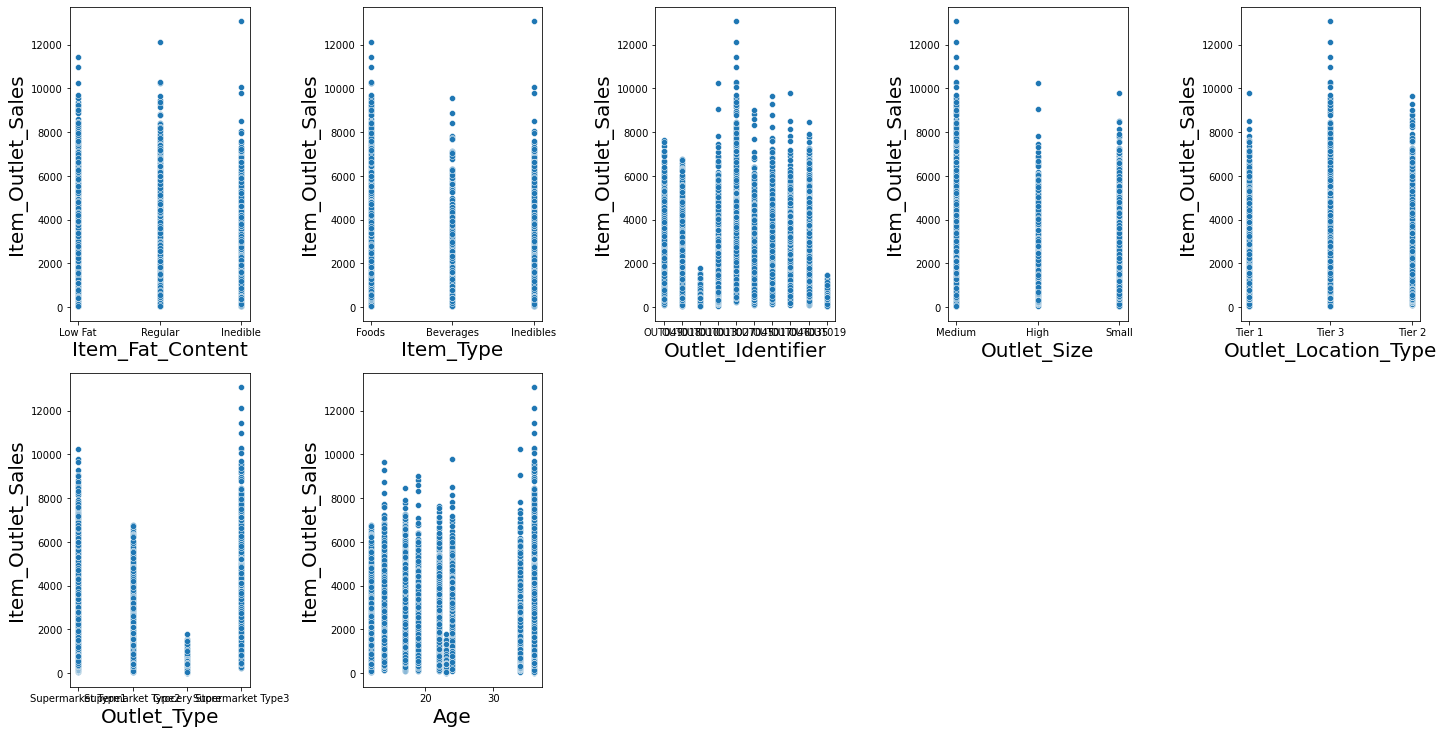

In [145]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = BM_train['Item_Outlet_Sales']
X = BM_train.drop(columns=['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnum+=1
plt.tight_layout()

From the above graphs it is observed that Outlet_type has a positive relation with Item_Outlet_sales. 

Supermarket Type3 generates the more sales when compared to the Supermarket types 1 and 2 and Grocery Stores.

Tier 3 City Outlets generate a lot of sales.
Age of the establishment also plays an important role when age of the establishment is above 30. This maybe because Outlets that have been running for the longest sell the highest.



<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

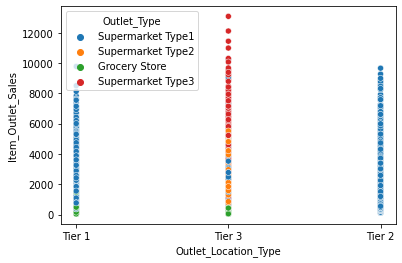

In [146]:
sns.scatterplot(data=BM_train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type')

From the graph it is observed that Tier 3 Cities generate the most sales and have a good mix of Supermarket Type 2 and Type 3 along with Grocery stores.

Tier 2 and Tier 1 cities have more of Supermarket Type1 with a few Grocery stores.

Outlet_Location_Type has a good relation with Item_Outlet_sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

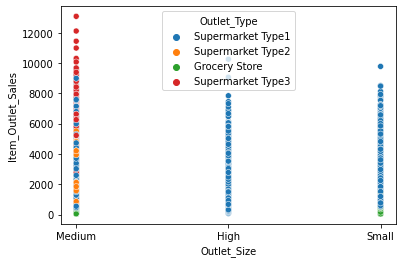

In [147]:
sns.scatterplot(data=BM_train, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type')

From the graph it is observed that  Medium Sized Outlets generate the Highest sales and are a mix of Supermaraket Type1,Type2,Type3 and Grocery Stores.

High and small Sized Outlets comprise mostly of Supermarket Type1

### Encoding Categorical Columns

####  Encoding 'Outlet_Type','Outlet_Identifier' using get_dummies()

In [148]:
dumm = pd.get_dummies(BM_train[['Outlet_Type','Outlet_Identifier']]) 

In [149]:
dumm

,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,0,1,0,0,0,1,0,0,0,0,0,0,0,0
8424,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8425,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8426,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [150]:
dumm2 = pd.get_dummies(BM_test[['Outlet_Type','Outlet_Identifier']],drop_first = False)

In [151]:
dumm2

,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5590,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5591,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5592,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [152]:
dm_train = BM_train.copy()
dm_test = BM_test.copy()

In [153]:
BM_train = BM_train.join(dumm)

In [154]:
BM_train.drop(columns=['Outlet_Type','Outlet_Identifier'],inplace=True)

In [155]:
BM_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,Low Fat,-1.442725,Foods,249.8092,Medium,Tier 1,3735.1380,22,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,Regular,-1.309692,Beverages,48.2692,Medium,Tier 3,443.4228,12,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,Low Fat,-1.412983,Foods,141.6180,Medium,Tier 1,2097.2700,22,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,Regular,-0.051106,Foods,182.0950,Medium,Tier 3,732.3800,23,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,Inedible,-0.051106,Inedibles,53.8614,High,Tier 3,994.7052,34,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,6.865,Low Fat,-0.054236,Foods,214.5218,High,Tier 3,2778.3834,34,0,...,0,1,0,0,0,0,0,0,0,0
8424,8.380,Regular,-0.336739,Foods,108.1570,Medium,Tier 2,549.2850,19,0,...,0,0,0,0,0,0,0,1,0,0
8425,10.600,Inedible,-0.716902,Inedibles,85.1224,Small,Tier 2,1193.1136,17,0,...,0,0,0,0,0,0,1,0,0,0
8426,7.210,Regular,1.556591,Foods,103.1332,Medium,Tier 3,1845.5976,12,0,...,0,0,0,1,0,0,0,0,0,0


In [156]:
BM_test = BM_test.join(dumm2)

In [157]:
BM_test.drop(columns=['Outlet_Type','Outlet_Identifier'],inplace=True)

In [158]:
BM_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.75000,Low Fat,-1.833918,Foods,107.8622,Medium,Tier 1,22,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.30000,Regular,-0.608874,Beverages,87.3198,Medium,Tier 2,14,0,1,...,0,0,1,0,0,0,0,0,0,0
2,14.60000,Low Fat,0.930118,Foods,241.7538,Medium,Tier 3,23,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.31500,Low Fat,-1.485170,Foods,155.0340,Medium,Tier 2,14,0,1,...,0,0,1,0,0,0,0,0,0,0
4,12.95504,Inedible,1.248922,Inedibles,234.2300,Medium,Tier 3,36,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,10.50000,Regular,-1.566897,Foods,141.3154,Small,Tier 1,24,0,1,...,0,0,0,0,0,0,0,0,1,0
5590,7.60000,Regular,1.581831,Foods,169.1448,Medium,Tier 3,12,0,0,...,0,0,0,1,0,0,0,0,0,0
5591,10.00000,Low Fat,0.386391,Foods,118.7440,Medium,Tier 2,19,0,1,...,0,0,0,0,0,0,0,1,0,0
5592,15.30000,Regular,-0.012140,Foods,214.6218,Medium,Tier 2,14,0,1,...,0,0,1,0,0,0,0,0,0,0


In [159]:
BM_train['Item_Fat_Content'] = BM_train.Item_Fat_Content.map({'Inedible':1,'Low Fat':2,'Regular':3})

In [160]:
BM_test['Item_Fat_Content'] = BM_test.Item_Fat_Content.map({'Inedible':1,'Low Fat':2,'Regular':3})

In [161]:
BM_train['Item_Type'] = BM_train.Item_Type.map({'Inedibles':1,'Foods':2,'Beverages':3})

In [162]:
BM_test['Item_Type'] = BM_test.Item_Type.map({'Inedibles':1,'Foods':2,'Beverages':3})

In [163]:
BM_train['Outlet_Size'] = BM_train.Outlet_Size.map({'Small':1,'Medium':2,'High':3})

In [164]:
BM_test['Outlet_Size'] = BM_test.Outlet_Size.map({'Small':1,'Medium':2,'High':3})

In [165]:
BM_train['Outlet_Location_Type'] = BM_train.Outlet_Location_Type.map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [166]:
BM_test['Outlet_Location_Type'] = BM_test.Outlet_Location_Type.map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [167]:
BM_train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30000,2,-1.442725,2,249.8092,2,1,3735.1380,22,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92000,3,-1.309692,3,48.2692,2,3,443.4228,12,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50000,2,-1.412983,2,141.6180,2,1,2097.2700,22,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20000,3,-0.051106,2,182.0950,2,3,732.3800,23,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93000,1,-0.051106,1,53.8614,3,3,994.7052,34,0,...,0,1,0,0,0,0,0,0,0,0
5,10.39500,3,-0.051106,2,51.4008,2,3,556.6088,12,0,...,0,0,0,1,0,0,0,0,0,0
6,13.65000,3,-1.583669,2,57.6588,3,3,343.5528,34,0,...,0,1,0,0,0,0,0,0,0,0
7,12.98788,2,1.334138,2,107.7622,2,3,4022.7636,36,0,...,0,0,0,0,0,1,0,0,0,0
8,16.20000,3,-1.416017,2,96.9726,2,2,1076.5986,19,0,...,0,0,0,0,0,0,0,1,0,0
9,19.20000,3,0.804238,2,187.8214,2,2,4710.5350,14,0,...,0,0,1,0,0,0,0,0,0,0


In [168]:
BM_test.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.750000,2,-1.833918,2,107.8622,2,1,22,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,3,-0.608874,3,87.3198,2,2,14,0,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,2,0.930118,2,241.7538,2,3,23,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,2,-1.485170,2,155.0340,2,2,14,0,1,...,0,0,1,0,0,0,0,0,0,0
4,12.955040,1,1.248922,1,234.2300,2,3,36,0,0,...,0,0,0,0,0,1,0,0,0,0
5,9.800000,3,0.145161,2,117.1492,1,1,24,0,1,...,0,0,0,0,0,0,0,0,1,0
6,19.350000,3,0.591727,2,50.1034,2,3,12,0,0,...,0,0,0,1,0,0,0,0,0,0
7,12.272418,2,-1.468349,2,81.0592,2,3,36,0,0,...,0,0,0,0,0,1,0,0,0,0
8,6.305000,3,1.320125,2,95.7436,2,2,19,0,1,...,0,0,0,0,0,0,0,1,0,0
9,5.985000,2,-1.921449,2,186.8924,2,2,14,0,1,...,0,0,1,0,0,0,0,0,0,0


### All categorical columns have been encoded

### Finding Correlation 

In [169]:
d_corr = BM_train.corr()

In [170]:
d_corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
Item_Weight,1.000000,-0.045034,-0.018078,-0.085976,0.025361,0.007040,0.004421,0.011071,0.008528,0.005884,...,0.006881,0.012003,-0.002897,0.000968,0.001073,-0.000954,-0.002682,-0.017554,0.000426,0.004628
Item_Fat_Content,-0.045034,1.000000,0.079416,0.595517,0.002461,0.000569,-0.003854,0.021665,-0.006646,-0.014052,...,-0.010909,-0.003253,0.004667,0.002903,-0.008292,0.001764,0.002200,-0.002999,-0.000442,0.009597
Item_Visibility,-0.018078,0.079416,1.000000,0.060248,-0.000300,-0.042087,-0.012939,-0.082427,0.036934,0.183355,...,0.123652,-0.027656,-0.016169,-0.016483,0.127573,-0.036528,-0.018895,-0.025616,-0.022097,-0.024756
Item_Type,-0.085976,0.595517,0.060248,1.000000,-0.022711,0.003214,-0.003181,-0.001645,-0.011005,-0.015579,...,-0.008894,-0.003375,0.005153,-0.001458,-0.012511,-0.001621,0.006981,0.006148,-0.007305,0.011492
Item_MRP,0.025361,0.002461,-0.000300,-0.022711,1.000000,-0.004075,0.003314,0.573491,-0.006989,-0.004335,...,0.004372,0.002434,-0.008884,0.003855,-0.010579,-0.006773,0.012024,-0.000259,0.006001,-0.003949
Outlet_Size,0.007040,0.000569,-0.042087,0.003214,-0.004075,1.000000,0.610106,0.079486,0.209482,-0.190911,...,0.070642,0.685584,0.097486,0.097605,-0.339545,0.098018,-0.489311,0.097664,-0.489311,0.097723
Outlet_Location_Type,0.004421,-0.003854,-0.012939,-0.003181,0.003314,0.610106,1.000000,0.087474,0.104085,-0.034632,...,0.277990,0.385026,-0.050070,0.384096,-0.336515,0.385722,-0.050192,-0.050161,-0.484944,-0.484944
Item_Outlet_Sales,0.011071,0.021665,-0.082427,-0.001645,0.573491,0.079486,0.087474,1.000000,0.060149,-0.398163,...,-0.277934,0.020061,0.028579,-0.042619,-0.267263,0.309205,0.048931,-0.001990,0.015666,0.030235
Age,0.008528,-0.006646,0.036934,-0.011005,-0.006989,0.209482,0.104085,0.060149,1.000000,0.268711,...,-0.002690,0.460445,-0.382111,-0.466765,0.377621,0.545825,-0.256599,-0.172202,0.038426,-0.045867
Outlet_Type_Grocery Store,0.005884,-0.014052,0.183355,-0.015579,-0.004335,-0.190911,-0.034632,-0.398163,0.268711,1.000000,...,0.698620,-0.128495,-0.128029,-0.128184,0.670640,-0.128727,-0.128340,-0.128262,-0.128340,-0.128340


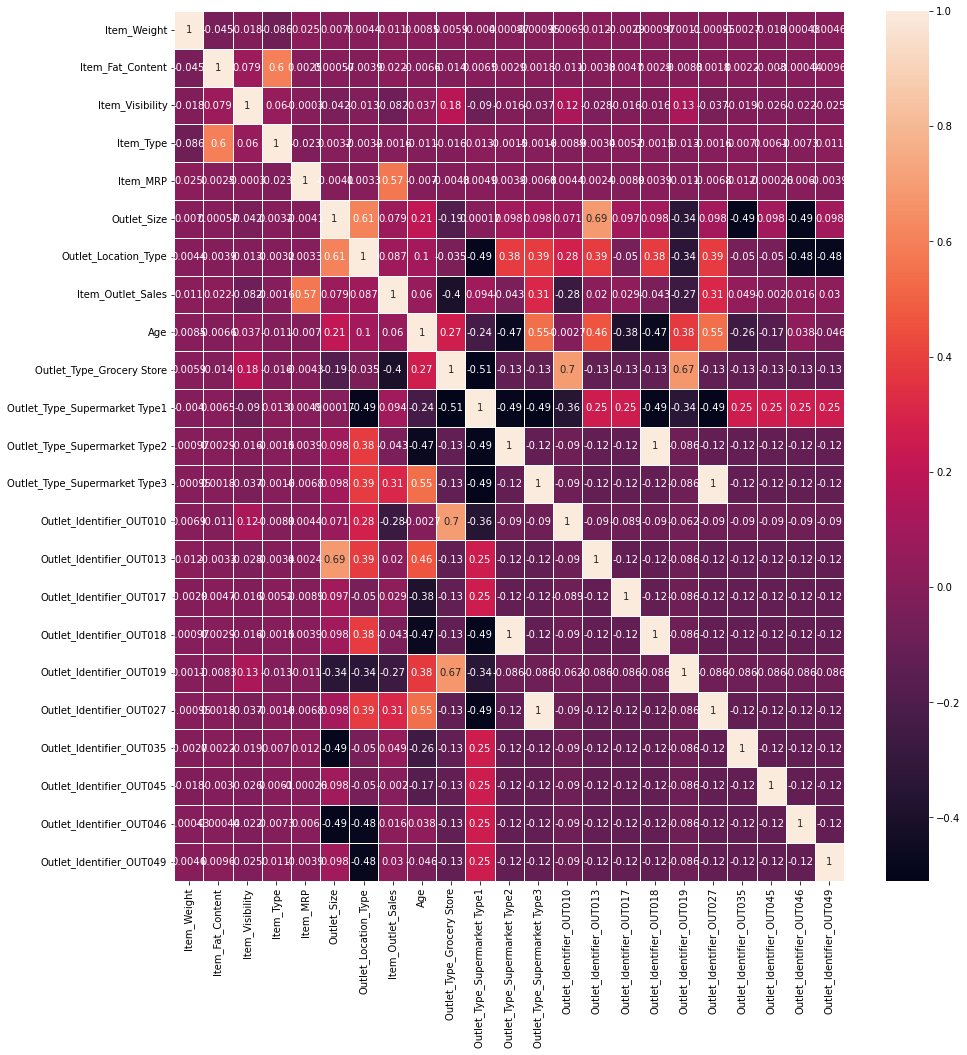

In [171]:
plt.figure(figsize=(15,16))
sns.heatmap(d_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

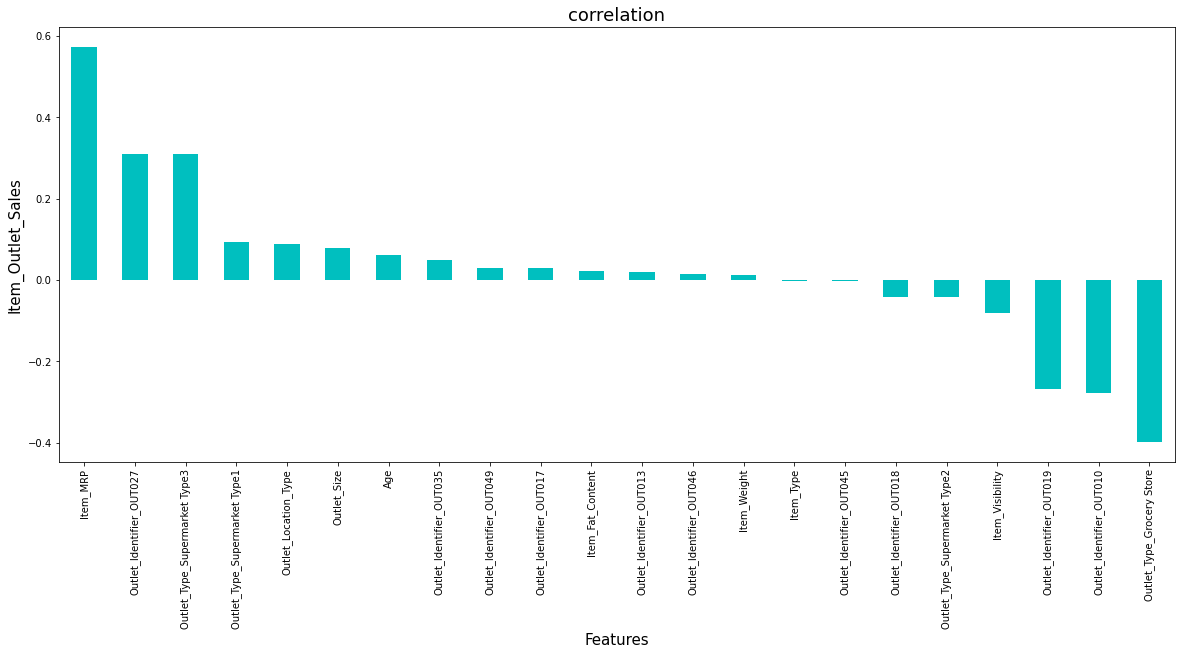

In [172]:
plt.figure(figsize = (20,8))
BM_train.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Item_MRP has the highest positive correlation with Item_Outlet_Sales, followed by Outlet_Type_Supermarket Type3 and Outlet_Identifier_OUT027.

Outlet_Type_Grocery Store has highest negative correlation with Item_Outlet_sales followed by Outlet_Identifier_OUT010 and Outlet_Identifier_OUT019

### Feature Selection

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
X =BM_train.drop(columns=['Item_Outlet_Sales'])
y =BM_train['Item_Outlet_Sales']

In [175]:
scaler= StandardScaler()

In [176]:
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
vif = pd.DataFrame()

In [179]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [180]:
vif

,Features,vif
0,Item_Weight,1.008727
1,Item_Fat_Content,1.555450
2,Item_Visibility,1.042941
3,Item_Type,1.560243
4,Item_MRP,1.001892
5,Outlet_Size,inf
6,Outlet_Location_Type,inf
7,Age,inf
8,Outlet_Type_Grocery Store,inf
9,Outlet_Type_Supermarket Type1,inf


There is no multicollinearity

In [181]:
scaler= StandardScaler()
scaled_X_test = scaler.fit_transform(BM_test)

In [182]:
scaled_X_test

array([[ 1.88543144, -0.15681507, -1.8339182 , ..., -0.35273518,
        -0.35305548,  2.83241604],
       [-1.03089002,  1.31999217, -0.60887447, ..., -0.35273518,
        -0.35305548, -0.35305548],
       [ 0.44483891, -0.15681507,  0.93011846, ..., -0.35273518,
        -0.35305548, -0.35305548],
       ...,
       [-0.63267746, -0.15681507,  0.38639056, ...,  2.83498795,
        -0.35305548, -0.35305548],
       [ 0.60880879,  1.31999217, -0.01214013, ..., -0.35273518,
        -0.35305548, -0.35305548],
       [-0.7497988 , -1.63362231,  1.02216198, ...,  2.83498795,
        -0.35305548, -0.35305548]])

### Selecting Kbest Features

In [183]:
from sklearn.feature_selection import SelectKBest, f_classif

In [184]:
bestfeat = SelectKBest(score_func = f_classif, k = 22)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [185]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

                          Feature     Score
8       Outlet_Type_Grocery Store  4.241044
4                        Item_MRP  3.501741
16       Outlet_Identifier_OUT019  1.782798
12       Outlet_Identifier_OUT010  1.780568
11  Outlet_Type_Supermarket Type3  1.751242
17       Outlet_Identifier_OUT027  1.751242
9   Outlet_Type_Supermarket Type1  1.586932
7                             Age  1.214545
2                 Item_Visibility  1.161522
1                Item_Fat_Content  1.112132
3                       Item_Type  1.071789
0                     Item_Weight  1.041603
6            Outlet_Location_Type  1.035315
5                     Outlet_Size  1.004025
18       Outlet_Identifier_OUT035  1.000072
20       Outlet_Identifier_OUT046  0.984630
13       Outlet_Identifier_OUT013  0.984232
21       Outlet_Identifier_OUT049  0.981800
14       Outlet_Identifier_OUT017  0.939199
10  Outlet_Type_Supermarket Type2  0.891431
15       Outlet_Identifier_OUT018  0.891431
19       Outlet_Identifier_OUT04

Selecting the best features based on scores above

In [186]:
xbest = X.drop(columns=['Outlet_Identifier_OUT018','Outlet_Identifier_OUT045'])

In [187]:
xbest

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,2,-1.442725,2,249.8092,2,1,22,0,1,0,0,0,0,0,0,0,0,0,1
1,5.920,3,-1.309692,3,48.2692,2,3,12,0,0,1,0,0,0,0,0,0,0,0,0
2,17.500,2,-1.412983,2,141.6180,2,1,22,0,1,0,0,0,0,0,0,0,0,0,1
3,19.200,3,-0.051106,2,182.0950,2,3,23,1,0,0,0,1,0,0,0,0,0,0,0
4,8.930,1,-0.051106,1,53.8614,3,3,34,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,6.865,2,-0.054236,2,214.5218,3,3,34,0,1,0,0,0,1,0,0,0,0,0,0
8424,8.380,3,-0.336739,2,108.1570,2,2,19,0,1,0,0,0,0,0,0,0,0,0,0
8425,10.600,1,-0.716902,1,85.1224,1,2,17,0,1,0,0,0,0,0,0,0,1,0,0
8426,7.210,3,1.556591,2,103.1332,2,3,12,0,0,1,0,0,0,0,0,0,0,0,0


In [188]:
xbest_ss = scaler.fit_transform(xbest)

In [189]:
x_best_test = BM_test.drop(columns=['Outlet_Identifier_OUT018','Outlet_Identifier_OUT045'])

In [190]:
scaler= StandardScaler()
scaled_X_test = scaler.fit_transform(x_best_test)

#### The Data to be predicted in Target / Label column is continuous in nature since it is the  total value of item Sales from each outlet. Therefore Regression Models will be used.

## Regression Model Building

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
from sklearn.metrics import r2_score

In [193]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.5782796105541068 on random_state: 34


In [194]:
x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state = 78)

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error


In [199]:
rf = RandomForestRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [200]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)

Ridge()

All models have been trained.

### Ridge Regression Model

In [201]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [202]:
r2_score(y_test,y_r_pred)

0.5769298611051032

#### Mean Squared Error 

In [203]:
mean_squared_error(y_test,y_r_pred)

1234990.703780602

###  Random Forest Regression Model

In [204]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [205]:
r2_score(y_test,y_rf_pred)

0.5761846760186975

#### Mean Squared Error

In [206]:
mean_squared_error(y_test,y_rf_pred)

1237165.9852994327

### XGB Regression Model 

In [207]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [208]:
r2_score(y_test,y_xg_pred)

0.5470844323222794

#### Mean Squared Error

In [209]:
mean_squared_error(y_test,y_xg_pred)

1322112.9648633923

### Support Vector Regression Model

In [210]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [211]:
r2_score(y_test,y_svr_pred)

0.01424557606179866

#### Mean Squared Error

In [212]:
mean_squared_error(y_test,y_svr_pred)

2877531.2598385

### Model Cross Validation

In [213]:
from sklearn.model_selection import cross_val_score

#### Ridge Regression

In [214]:
cross_val_score(r,xbest_ss,y,cv=5).mean()

0.5580461243748533

#### Random Forest Regression

In [215]:
cross_val_score(rf,xbest_ss,y,cv=5).mean()

0.5471522234280423

#### XGB Regression

In [216]:
cross_val_score(xg,xbest_ss,y,cv=5).mean()

0.5308848467554654

#### SV Regression

In [217]:
cross_val_score(SV,xbest_ss,y,cv=5).mean()

0.04970172826495691

Based on comparing Accuracy Score results with Cross Validation results, it is determined that XGB Regressor is the best model.

### Hyper Parameter Tuning

#### XGB Regressor

In [218]:
from sklearn.model_selection import GridSearchCV

In [219]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [224]:
GridCV = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [225]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[01:21:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'eta': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [10, 20, 40, 60, 80],
                         'min_child_weight': array([0, 1, 2, 3, 4]),
                         'subsample': [0.5, 1]},
             verbose=1)

In [227]:
GridCV.best_params_

{'booster': 'gblinear',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 0,
 'subsample': 0.5}

In [228]:
Best_mod = XGBRegressor(booster = 'gblinear',eta = 0.1, max_depth= 20, min_child_weight = 0,subsample = 0.5)
Best_mod.fit(x_train,y_train)

[01:22:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None, gamma=None,
             gpu_id=-1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=0, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, ...)

In [230]:
xgbpred = Best_mod.predict(x_test)

acc = r2_score(y_test,xgbpred)
print(acc*100)

57.7202528302273


##### XGB Regressor has an accuracy of 57.72%

#### Saving The Model

In [231]:
import joblib
joblib.dump(Best_mod,"BestModelBM.pkl")

['BestModelBM.pkl']

#### Loading The Model

In [235]:
mod=joblib.load("BestModelBM.pkl")

In [237]:
# Predicting the saved model 
Prediction = mod.predict(scaled_X_test)

In [240]:
pred=pd.DataFrame(Prediction)
pred

,0
0,1805.499268
1,1576.475342
2,1850.045166
3,2581.237061
4,5043.545410
...,...
5589,2317.567627
5590,2430.305420
5591,1781.592773
5592,3556.365967
